In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Recursive Integration Method and Bayesian Log-Likelihood Maximization

A related result can be found in D'Epifanio (1989, 1996). A direct corollary to **Theorem 5.10** justifies the recursive integration method, resulting in a Bayesian approach to maximizing the log-likelihood, $ \ell(x) $.

## Corollary 5.11

Let $ \pi(\theta) $ be a positive density on $ \Theta $. If there exists a unique maximum likelihood estimator $ \hat{\theta}_0 $, it satisfies:

$$
\lim_{A \to \infty} \frac{\int_\Theta \theta \exp\{A \ell(x | \theta)\} \pi(\theta) \, d\theta}{\int_\Theta \exp\{A \ell(x | \theta)\} \pi(\theta) \, d\theta} = \hat{\theta}_0
$$

This result uses the same technique as in **Theorem 5.10**, namely the Laplace approximation of the numerator and denominator integrals (see also Tierney et al., 1989). It mainly expresses the fact that the maximum likelihood estimator can be written as a limit of Bayes estimators associated with an arbitrary prior distribution and with virtual observations corresponding to the $ A $-th power of the likelihood, $ \exp\{A \ell(x | \theta)\} $.

When $ A \in \mathbb{N} $,

$$
\hat{\theta}_A(x) = \frac{\int_\Theta \theta \exp\{A \ell(x | \theta)\} \pi(\theta) \, d\theta}{\int_\Theta \exp\{A \ell(x | \theta)\} \pi(\theta) \, d\theta}
$$

is simply the Bayes estimator associated with the prior distribution $ \pi(\theta) $ and a corresponding sample consisting of $ A $ replications of the initial sample.

The intuition behind these results is that as the size of the sample goes to infinity, the influence of the prior distribution vanishes, and the distribution associated with $ \exp\{A \ell(x | \theta)\} \pi(\theta) $ becomes increasingly concentrated around the global maxima of $ \ell(x | \theta) $ as $ A $ increases (see, e.g., Schervish, 1995).

## Practical Implementation

From a practical perspective, the recursive integration method can be implemented by computing the Bayes estimators $ \hat{\theta}_A(x) $ for $ A = 1, 2, \dots $ until they stabilize.

This method is only interesting for maximizing the likelihood when more standard methods (like gradient ascent or Newton-Raphson) are difficult or impossible to implement, and the computation of Bayes estimators is straightforward. Chapters 7 and 9 show that this second condition is generally mild.

When iterative algorithms are used to compute $ \hat{\theta}_A(x) $, the solution from a previous value of $ A $ can serve as the initial value for the computation of $ \hat{\theta}_{A+1}(x) $ for a larger $ A $. This feature enhances the analogy with simulated annealing. The differences with simulated annealing are:

1. For a fixed "temperature" ($ 1/A $), the algorithm converges to a fixed value.
2. A continuous decrease of $ 1/A $# Recursive Integration Method and Bayesian Log-Likelihood Maximization

A related result can be found in D'Epifanio (1989, 1996). A direct corollary to **Theorem 5.10** justifies the recursive integration method, resulting in a Bayesian approach to maximizing the log-likelihood, $ \ell(x) $.



## Recursive Integration and Bayes Estimators

### Table 5.3
Sequence of Bayes estimators of $ \hat{\theta}_A $ for the estimation of $\theta^*$ when $ X \sim G(a,1) $ and $ a = 1.5 $:

$$
\begin{array}{|c|c|}
\hline
A & \hat{\theta}_A \\ 
\hline
5 & 2.02 \\ 
10 & 2.04 \\ 
100 & 1.89 \\ 
1000 & 1.98 \\ 
5000 & 1.94 \\ 
10^4 & 2.00 \\ 
\hline
\end{array}
$$

### Convergence Properties

1. The speed of convergence of $ A \to +\infty $ does not formally matter for the convergence of $ \hat{\theta}_A(x) $ to $ \theta^* $.
2. The statistical motivation for this method is stronger, particularly because of the meaning of the parameter $ A $.
3. The only analytical constraint on $ \ell(\theta) $ is the existence of a global maximum, $ \theta^* $ (see Robert and Titterington, 1998, for extensions).

---

## Example 12: Gamma Shape Estimation

Consider the estimation of the shape parameter, $ a $, of a $ G(a, \beta) $ distribution with $ \beta $ known. Without loss of generality, take $ \beta = 1 $. For a constant (improper) prior distribution on $ a $, the posterior distribution satisfies:

$$
\pi(a | x) \propto \ell(x | a) \pi(a) \propto a^{n-1} e^{-a \sum_{i=1}^n x_i}.
$$

For a fixed $ A $, the computation of $ \mathbb{E}[a | x, A] $ can be obtained by simulation with the Metropolis-Hastings algorithm (see Chapter 7 for details). The instrumental distribution is $ \text{Exp}(1/a^{(n-1)}) $, where $ a^{(n-1)} $ denotes the previous value of the associated Markov chain. 

Table 5.3 shows the evolution of $ \hat{\theta}_A(x) = \mathbb{E}[a | x, A] $ against $ A $, for $ x = 1.5 $.

An analytical verification (using a numerical package like Mathematica) shows that the maximum of $ \ell(a | x) $ is close to 2.0 for $ x = 1.5 $.

---

## Example 5.13: Isotonic Regr# Monte Carlo Optimization




## Example 13: Isotonic Regression

Consider a table of normal observations $ X_{ij} \sim N(\theta_{ij}, 1) $ with means that satisfy the constraints:

$$
\theta_{ij-1} \leq \theta_{ij} \leq \theta_{ij+1}, \quad \forall i,j.
$$

Dykstra and Robertson (1982) developed an efficient deterministic algorithm to maximize the likelihood under these restrictions (see Problems 1.18 and 1.19). However, a direct application of recursive integration also provides the maximum likelihood estimator of $ \theta = (\theta_{ij}) $, requiring neither extensive theoretical study nor advanced programming skills.

---

### Practical Considerations

While recursive integration has clear appeal, note the following caveat:

- If $ A $ increases too quickly, there may be convergence to a local mode, which can negatively impact performance (see Robert and Titterington, 1998, for an illustration).
ession

Consider a table of normal observations $ X_{ij} \sim N(\theta_{ij}, 1) $ with means that satisfy the constraints:

$$
\theta_{ij-1} \leq \theta_{ij} \leq \theta_{ij+1}, \quad \forall i,j.
$$

Dykstra and Robertson (1982) developed an efficient deterministic algorithm to maximize the likelihood under these restrictions (see Problems 1.18 and 1.19). However, a direct application of recursive integration also provides the maximum likelihood estimator of $ \theta = (\theta_{ij}) $, requiring neither extensive theoretical study nor advanced programming skills.

---

### Practical Considerations

While recursive integration has clear appeal, note the following caveat:

- If $ A $ increases too quickly, there may be convergence to a local mode, which can negatively impact performance (see Robert and Titterington, 1998, for an illustration).
pute $ \hat{\theta}_A(x) $, the solution from a previous value of $ A $ can serve as the initial value for the computation of $ \hat{\theta}_{A+1}(x) $ for a larger $ A $. This feature enhances the analogy with simulated annealing. The differences with simulated annealing are:

1. For a fixed "temperature" $( 1/A $), the algorithm converges to a fixed value.
2. A continuous decrease of $ 1/A $ is statistically meaningless.
 is statistically meaningless.


# Analysis of University of Iowa Grades Data

This notebook explores the data from Robertson et al. (1988) and the analysis from Robert and Hwang (1996), which relates first-year university grades to entrance exams at the University of Iowa. 

## Data from Table 5.4

The following table presents the average grades of first-year students at the University of Iowa based on their High School Rank (HSR) and ACT scores. Numbers in parentheses indicate the number of students in each category.

| ACT | 91-99 | 81-90 | 71-80 | 61-70 | 51-60 | 41-50 | 31-40 | 21-30 | 00-20 |
|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 1-12  | 1.57 (4) | 1.80 (6) | 1.88 (10) | 2.21 (0) | 1.00 (11) | 1.75 (5) | 1.92 (7) | 1.02 (1) | 1.58 (1) |
| 13-15 | 2.11 (5) | 1.94 (15) | 2.32 (13) | 2.23 (0) | 2.06 (16) | 1.98 (12) | 1.84 (8) | 2.15 (5) | 2.49 (5) |
| 16-18 | 2.73 (18) | 2.52 (30) | 2.32 (51) | 2.20 (0) | 2.12 (49) | 2.05 (31) | 1.95 (27) | 1.91 (5) | 2.00 (7) |
| 19-21 | 2.96 (39) | 2.68 (65) | 2.53 (83) | 2.20 (64) | 2.11 (63) | 2.16 (42) | 2.02 (18) | 1.85 (14) | 2.07 (7) |
| 22-24 | 2.97 (125) | 2.69 (117) | 2.58 (115) | 2.00 (70) | 2.81 (57) | 2.35 (34) | 2.10 (13) | 1.88 (11) | — (0) |
| 25-27 | 3.13 (219) | 2.82 (143) | 2.55 (107) | 2.41 (10) | 2.10 (40) | 2.48 (21) | 1.49 (2) | 3.78 (1) | — (0) |
| 28-30 | 3.41 (232) | 2.75 (70) | 2.72 (24) | — (0) | 1.58 (4) | 1.35 (4) | — (0) | — (0) | — (0) |
| 31-33 | 3.45 (47) | 2.74 (8) | 2.75 (4) | — (0) | 2.13 (1) | — (0) | — (0) | — (0) | — (0) |
| 34-36 | 3.51 (4) | — (0) | 2.75 (4) | — (0) | — (0) | — (0) | — (0) | — (0) | — (0) |

---

## Data from Table 5.5

The following table provides the maximum likelihood estimates of the mean grades under a lexicographical constraint as analyzed by Robert and Hwang (1996).

| ACT | 91-99 | 81-89 | 71-79 | 61-69 | 51-59 | 41-49 | 31-39 | 21-29 | 00-20 |
|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 1-12  | 1.87  | 1.87  | 1.86  | 1.86  | 1.74  | 1.74  | 1.74  | 1.62  | 1.38  |
| 13-15 | 2.18  | 2.17  | 2.17  | 2.17  | 2.06  | 1.98  | 1.94  | 1.93  | 1.57  |
| 16-18 | 2.73  | 2.52  | 2.32  | 2.29  | 2.12  | 2.05  | 1.99  | 1.97  | 1.97  |
| 19-21 | 2.96  | 2.68  | 2.53  | 2.29  | 2.13  | 2.13  | 1.99  | 1.97  | 1.97  |
| 22-24 | 2.97  | 2.69  | 2.56  | 2.40  | 2.24  | 2.24  | 2.02  | 1.98  | 1.97  |
| 25-27 | 3.13  | 2.79  | 2.57  | 2.46  | 2.24  | 2.24  | 2.06  | 2.05  | 1.97  |
| 28-30 | 3.41  | 2.79  | 2.72  | 2.47  | 2.24  | 2.24  | 2.06  | 2.06  | 1.97  |
| 31-33 | 3.45  | 2.80  | 2.76  | —     | 2.27  | —     | —     | —     | —     |
| 34-36 | 3.51  | —     | —     | —     | —     | —     | —     | —     | —     |

---

### Mathematical Representation

The function to minimize is the least squares criterion:

$$
\text{Minimize } S = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $ y_i $ represents the observed grades and $ \hat{y}_i $ represents the predicted grades. This criterion allows the use of a normal model, even for bounded data, as discussed in Example 1.5.


## Stochastic Approximation

In this section, we explore methods that work more directly with the objective function $ h $, focusing on approximations of $ h $ that guide optimization. These approximations serve a distinct purpose compared to those discussed in earlier sections (e.g., Laplace and saddlepoint approximations in Section 3.4 and Section 3.6.2). While these methods may introduce an additional level of error, they can simplify the computation of the maximum of $ h $.

Most of the methods discussed in this section are designed for so-called *missing data models*. We begin with a brief introduction to these models.

---

##  Missing Data Models and Demarginalization

In many statistical models, missing (or latent) elements complicate the observed model. Examples include:

- **Censored data models** (Example 1.1), where some observations are censored.
- **Mixture models** (Example 1.2), where the component generating the observation is unobserved.
- **Logistic regression** (Example 1.13), where the binary outcome $ Y $ can be viewed as an indicator that a latent continuous variable with a logistic distribution is less than some threshold.

In such models, the likelihood can often be expressed as:

$$
g(x; \theta) = \int f(x, z; \theta) \, dz
\tag{5.7}
$$

Alternatively, the objective function $ h(x) $ to be optimized can be written as an expectation:

$$
h(x) = \mathbb{E}[H(x, Z)]
\tag{5.8}
$$

This formulation is particularly useful in the context of censoring models.

---

### Example.14: Censored Data Likelihood

Suppose we observe $ Y_1, \ldots, Y_n $, which are independent and identically distributed (i.i.d.) from some density $f(y) $. The observations are ordered so that:

- $ Y_1, \ldots, Y_m $ are uncensored.
- $ Y_{m+1}, \ldots, Y_n $ are censored, and their value is recorded as $ a $.

The likelihood function for this model is:

$$
L(\theta) = \prod_{i=1}^m f(Y_i; \theta) \prod_{i=m+1}^n S(a; \theta)
$$

where:

- $ f(Y_i; \theta) $ is the density for uncensored observations.
- $ S(a; \theta) = 1 - F(a; \theta) $ is the survival function for censored observations.

Here, $ F(a; \theta) $ represents the cumulative distribution function (CDF) of the data at $ a $.

---

This representation highlights the role of latent variables or missing data in complicating the likelihood and motivates the need for stochastic approximation methods.
## Likelihoods and Missing Data Models

This section explores how missing data models can affect likelihoods and estimation, as well as the utility of the complete-data likelihood in simplifying computations.

---

## Observed-Data Likelihood

Given a sample of size $ n $ from a distribution $ f(y) $, the observed-data likelihood can be expressed as:

$$
L(\theta \mid y) = [1 - F(a)]^{n-m} \prod_{i=1}^m f(y_i - \theta)
\tag{5.9}
$$

where:

- $ F(a) $ is the cumulative distribution function (CDF) associated with $ f $,
- $ m $ represents the number of uncensored observations,
- $ n-m $ represents the number of censored observations.

---

## Complete-Data Likelihood

If the censored values were observed as $ z = (z_{m+1}, \ldots, z_n) $, the complete-data likelihood would be:

$$
L(y, z \mid \theta) = \prod_{i=1}^m f(y_i - \theta) \prod_{i=m+1}^n f(z_i - \theta)
$$

This likelihood is often easier to work with, especially if the model belongs to the exponential family.

---

## Connection Between Observed and Complete Likelihoods

The observed-data likelihood can also be written in terms of the complete-data likelihood:

$$
L(\theta \mid y) = \mathbb{E} \big[ L^{\text{complete}}(\theta \mid y, Z) \big] 
= \int L^{\text{complete}}(\theta \mid y, z) f(z \mid y, \theta) \, dz
$$

where $ f(z \mid y, \theta) $ is the conditional density of the missing data given the observed data.

---

## Illustration: Likelihoods for $ N(4, 1) $

For a sample of size $ n = 25 $ from $ N(4, 1) $, three likelihoods are illustrated in **Fig.6**:

1. **Dotted**: Likelihood for data where values greater than 4.5 are replaced by 4.5.
2. **Solid**: Observed-data likelihood $ L(\theta \mid y) $ from Equation (5.9).
3. **Dashed**: True likelihood using the actual uncensored data.

The observed-data likelihood is biased downward compared to the true likelihood.

---

## Missing Data Models and the Complete-Data Likelihood

When the assumption in Equation (5.7) holds, the $ Z $-vector (representing missing data) simplifies calculations, and its selection should not affect the estimator's value. In such cases:

- The function 

$$
L^{\text{complete}}(\theta \mid x, z) = f(x, z)
$$ 

is referred to as the **complete-data likelihood**.
- The complete-data likelihood corresponds to observing the full dataset $ (x, z) $.

The complete-data model is often within the exponential family, facilitating computations. For additional details, see **Problem 5.14**.

---

### Example: EM and MCEM

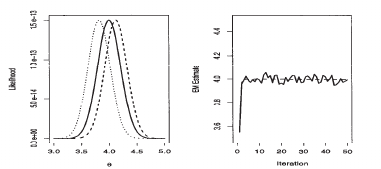

The right panel of **Fig.6** compares the estimates obtained using:

- **EM Algorithm** (dashed line),
- **MCEM Algorithm** (solid line).

These methods leverage the observed-data and complete-data likelihoods for optimization.

---

### Figures and Observations

#### Left Panel of Figure 5.6
Three likelihoods for $ N(4, 1) $ data:
- Likelihood with censored values,
- Observed-data likelihood,
- True likelihood.

#### Right Panel of Figure 5.6
Comparison of EM and MCEM estimates.

---

### Conclusion

The use of complete-data likelihoods simplifies working with missing data models, often leveraging the exponential family framework. However, biases can arise in the observed-data likelihood, necessitating carefu


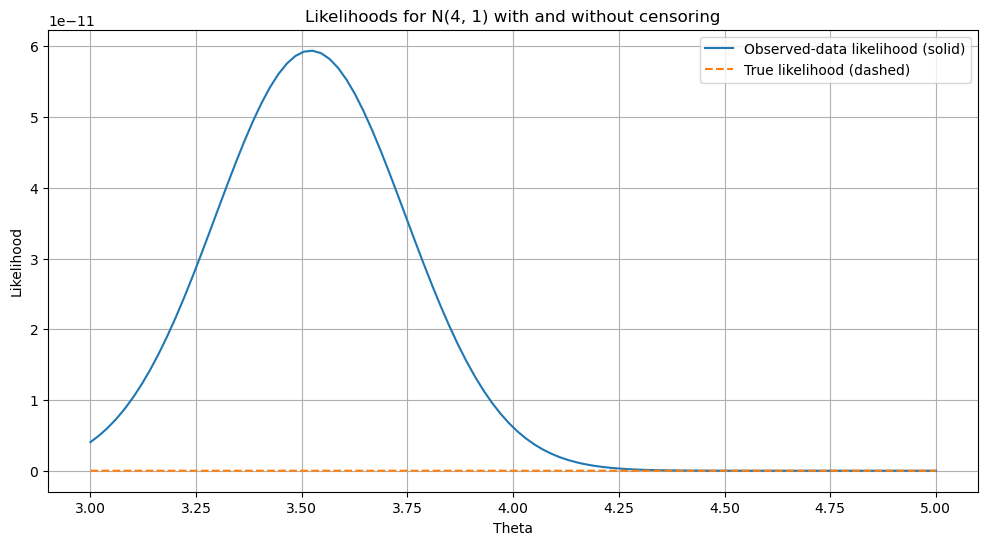

EM Algorithm estimated theta: 3.9739


In [1]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define parameters for the normal distribution
mu = 4  # mean
sigma = 1  # standard deviation

# Generate a sample of size 25 from N(4, 1)
np.random.seed(42)  # for reproducibility
sample_size = 25
data = np.random.normal(mu, sigma, sample_size)

# Censor data: replace values greater than 4.5 with 4.5
censored_data = np.minimum(data, 4.5)

# Compute the observed-data likelihood (Equation 5.9)
def observed_data_likelihood(theta, data, censoring_point):
    uncensored = data[data <= censoring_point]
    censored = data[data > censoring_point]
    uncensored_likelihood = np.prod(stats.norm.pdf(uncensored, loc=theta, scale=sigma))
    censored_likelihood = np.prod(1 - stats.norm.cdf(censoring_point, loc=theta, scale=sigma))
    return uncensored_likelihood * censored_likelihood

# True likelihood using the actual data
def true_likelihood(theta, data):
    return np.prod(stats.norm.pdf(data, loc=theta, scale=sigma))

# Likelihood for censored values (dotted)
theta_values = np.linspace(3.0, 5.0, 100)
observed_likelihoods = [observed_data_likelihood(theta, data, 4.5) for theta in theta_values]
true_likelihoods = [true_likelihood(theta, data) for theta in theta_values]

# Plotting the likelihoods
plt.figure(figsize=(12, 6))

# Observed-data likelihood
plt.plot(theta_values, observed_likelihoods, label="Observed-data likelihood (solid)", linestyle="-")

# True likelihood
plt.plot(theta_values, true_likelihoods, label="True likelihood (dashed)", linestyle="--")

# Annotating
plt.title("Likelihoods for N(4, 1) with and without censoring")
plt.xlabel("Theta")
plt.ylabel("Likelihood")
plt.legend()
plt.grid()
plt.show()

# EM Algorithm Implementation
def em_algorithm(data, censoring_point, initial_theta, max_iter=100, tol=1e-6):
    theta = initial_theta
    for iteration in range(max_iter):
        # E-step: Estimate censored values
        uncensored = data[data <= censoring_point]
        censored_count = np.sum(data > censoring_point)
        expected_censored = censoring_point + stats.norm.pdf(censoring_point - theta) / (1 - stats.norm.cdf(censoring_point - theta))
        
        # M-step: Maximize likelihood
        total_data = np.concatenate([uncensored, np.full(censored_count, expected_censored)])
        new_theta = np.mean(total_data)
        
        # Check convergence
        if np.abs(new_theta - theta) < tol:
            break
        theta = new_theta
    return theta

# Run EM algorithm
initial_theta = 3.5
estimated_theta_em = em_algorithm(data, 4.5, initial_theta)

print(f"EM Algorithm estimated theta: {estimated_theta_em:.4f}")


In [3]:
# Basic Python implementation of likelihood calculation and EM algorithm without external libraries

# Define parameters for the normal distribution
mu = 4  # True mean
sigma = 1  # Standard deviation

# Generate a sample of size 25 from N(4, 1)
import math  # Import the math library for trigonometric functions

# Generate a sample of size 25 from N(mean, std_dev)
def normal_sample(mean, std_dev, size, seed=42):
    rng = (1103515245 * seed + 12345) % (2**31)
    samples = []
    for _ in range(size):
        rng = (1103515245 * rng + 12345) % (2**31)
        u1 = rng / (2**31)
        rng = (1103515245 * rng + 12345) % (2**31)
        u2 = rng / (2**31)
        z = (-2 * math.log(u1))**0.5 * math.cos(u2 * 6.283185307179586)  # Box-Muller transform
        samples.append(mean + std_dev * z)
    return samples

# Parameters
mu = 4
sigma = 1

# Generate the data
data = normal_sample(mu, sigma, 25)

# Print the generated data to verify
print("Generated Data:", data)


data = normal_sample(mu, sigma, 25)

# Censor data: replace values greater than 4.5 with 4.5
censoring_point = 4.5
censored_data = [min(x, censoring_point) for x in data]

# PDF of the normal distribution
def normal_pdf(x, mean, std_dev):
    factor = 1 / (std_dev * (2 * 3.141592653589793)**0.5)
    exponent = -((x - mean) ** 2) / (2 * std_dev**2)
    return factor * (2.718281828459045 ** exponent)

# CDF of the normal distribution
def normal_cdf(x, mean, std_dev):
    z = (x - mean) / (std_dev * (2**0.5))
    t = 1 / (1 + 0.3275911 * abs(z))
    erf = 1 - (0.254829592 * t - 0.284496736 * t**2 + 1.421413741 * t**3 - 1.453152027 * t**4 + 1.061405429 * t**5) * (2.718281828459045 ** (-z**2))
    return 0.5 * (1 + erf) if z >= 0 else 0.5 * (1 - erf)

# Observed-data likelihood
def observed_data_likelihood(theta, data, censoring_point, sigma):
    uncensored = [x for x in data if x <= censoring_point]
    censored = len(data) - len(uncensored)
    uncensored_likelihood = 1
    for x in uncensored:
        uncensored_likelihood *= normal_pdf(x, theta, sigma)
    censored_likelihood = (1 - normal_cdf(censoring_point, theta, sigma))**censored
    return uncensored_likelihood * censored_likelihood

# EM Algorithm
def em_algorithm(data, censoring_point, sigma, initial_theta, max_iter=100, tol=1e-6):
    theta = initial_theta
    for iteration in range(max_iter):
        # E-step: Estimate censored values
        uncensored = [x for x in data if x <= censoring_point]
        censored_count = len(data) - len(uncensored)
        expected_censored = censoring_point + (normal_pdf(censoring_point, theta, sigma) / (1 - normal_cdf(censoring_point, theta, sigma)))
        
        # M-step: Maximize likelihood
        total_data = uncensored + [expected_censored] * censored_count
        new_theta = sum(total_data) / len(total_data)
        
        # Check convergence
        if abs(new_theta - theta) < tol:
            break
        theta = new_theta
    return theta

# Calculate observed likelihoods
theta_values = [3.0 + i * 0.05 for i in range(41)]
observed_likelihoods = [observed_data_likelihood(theta, censored_data, censoring_point, sigma) for theta in theta_values]

# Run EM algorithm
initial_theta = 3.5
estimated_theta_em = em_algorithm(censored_data, censoring_point, sigma, initial_theta)

# Display results
print(f"Estimated theta using EM algorithm: {estimated_theta_em:.4f}")

# Plot likelihoods (basic text-based output)
max_likelihood = max(observed_likelihoods)
for theta, likelihood in zip(theta_values, observed_likelihoods):
    bar_length = int(50 * likelihood / max_likelihood)
    print(f"Theta: {theta:.2f} | " + "#" * bar_length)


Generated Data: [2.8821205763451196, 3.371495718182425, 1.7357773254270574, 3.504092620389017, 4.3381790244871405, 2.93605360575557, 5.45992135636074, 2.8581818771120404, 4.59013327908004, 4.779379119350694, 2.2950660400755005, 3.517849135831616, 1.6072302717650264, 4.394353456216448, 3.551775388393164, 3.6447390982617023, 4.109508352109678, 4.1552764735812415, 4.833116782384586, 5.414748830670037, 3.927093289382336, 6.00403436883215, 4.6715325113662765, 3.972986988813563, 5.420874304614464]
Estimated theta using EM algorithm: 3.7121
Theta: 3.00 | 
Theta: 3.05 | 
Theta: 3.10 | 
Theta: 3.15 | 
Theta: 3.20 | #
Theta: 3.25 | ###
Theta: 3.30 | #####
Theta: 3.35 | #########
Theta: 3.40 | ##############
Theta: 3.45 | #####################
Theta: 3.50 | ############################
Theta: 3.55 | ####################################
Theta: 3.60 | ##########################################
Theta: 3.65 | ###############################################
Theta: 3.70 | ##############################

### Demarginalization and the EM Algorithm in Mathematical Representation

#### Demarginalization
More generally, we refer to the representation as demarginalization, a setting where a function (or a density) of interest can be expressed as an integral of a more manageable quantity:

$$
g(x; \theta) = \int h(x, z; \theta) \, dz
$$

This setup applies to various models such as:
- **Missing data models**: Censoring, grouping, mixing.
- **Latent variable models**: Tobit, probit, ARCH, stochastic volatility.
- **Artificial embedding**: Where $ Z $ in the integral has no inferential meaning, such as in slice sampling.

#### The EM Algorithm
The **Expectation-Maximization (EM) algorithm** was introduced by Dempster et al. (1977) to maximize likelihoods using a sequence of easier maximization problems.

Suppose $ X_1, X_2, \dots, X_n $ are independent and identically distributed (i.i.d.) from $ f(x; \theta) $, and we aim to compute:

$$
\hat{\theta} = \arg \max_\theta \, L(x; \theta) = \prod_{i=1}^n f(x_i; \theta).
$$

We augment the observed data $ x $ with $ z $, where $ (x, z) \sim f(x, z; \theta) $, and use the identity:

$$
f(x; \theta) = \int f(x, z; \theta) \, dz,
$$

which implies:

$$
k(z; \theta, x) = \frac{f(x, z; \theta)}{f(x; \theta)},
$$

where $ k(z; \theta, x) $ is the conditional distribution of $ Z $ given $ x $. This leads to the relationship between the complete-data likelihood $ L^c(\theta; x, z) $ and the observed-data likelihood $ L(x; \theta) $:

$$
\log L(x; \theta) = \mathbb{E}_{Z|X, \theta}[\log L^c(\theta; x, z)] - \mathbb{E}_{Z|X, \theta}[\log k(z; \theta, x)].
$$

#### Simplification in EM Algorithm
To maximize $ \log L(x; \theta) $, the second term can be ignored. Define the expected log-likelihood as:

$$
Q(\theta, \theta^{(t)}) = \mathbb{E}_{Z|X, \theta^{(t)}}[\log L^c(\theta; x, z)].
$$

The EM algorithm proceeds as follows:
1. **E-Step (Expectation):** Compute $ Q(\theta, \theta^{(t)}) $.
2. **M-Step (Maximization):** Maximize $ Q(\theta, \theta^{(t)}) $ to obtain $ \theta^{(t+1)} $.

This process iteratively updates $ \theta $, yielding a sequence $ \theta^{(1)}, \theta^{(2)}, \dots $ that converges to a local maximum of $ \log L(x; \theta) $.

#### Iterative EM Sequence
Each iteration can be represented mathematically as:

$$
\theta^{(t+1)} = \arg \max_\theta Q(\theta, \theta^{(t)}).
$$


### The EM Algorithm

#### Iterative Process
The EM algorithm iteratively computes parameter estimates by alternating between the **E-step** (Expectation) and the **M-step** (Maximization). At the $j$-th iteration:

1. **E-Step:** Calculate the expected log-likelihood:
   $$
   Q(\theta | \theta^{(j-1)}, x) = \mathbb{E}_{Z|X, \theta^{(j-1)}}[\log L^c(\theta; x, z)],
   $$
   where the expectation is taken with respect to the conditional distribution of the missing data $Z$ given the observed data $x$ and the current parameter estimate $\theta^{(j-1)}$.

2. **M-Step:** Maximize the expected log-likelihood:
   $$
   \theta^{(j)} = \arg \max_\theta Q(\theta | \theta^{(j-1)}, x).
   $$

The iterations continue until convergence to a fixed point of $Q$.

#### Algorithm A.20 - The EM Algorithm
1. **Initialization:** Start with an initial estimate $\theta^{(0)}$.
2. **E-Step:** Compute:
   $$
   Q(\theta | \theta^{(m)}, x) = \mathbb{E}_{Z|X, \theta^{(m)}}[\log L^c(\theta; x, z)].
   $$
3. **M-Step:** Maximize $Q$ with respect to $\theta$:
   $$
   \theta^{(m+1)} = \arg \max_\theta Q(\theta | \theta^{(m)}, x).
   $$
4. **Repeat:** Iterate until convergence, where $\theta^{(m+1)} \approx \theta^{(m)}$.

#### Theoretical Core of the EM Algorithm
The key property of the EM algorithm is that it increases the likelihood $L(x; \theta)$ at each step:

$$
L(\theta^{(j+1)}; x) \geq L(\theta^{(j)}; x),
$$

with equality holding if and only if:
$$
Q(\theta^{(j+1)} | \theta^{(j)}, x) = Q(\theta^{(j)} | \theta^{(j)}, x).
$$

#### Proof of Theorem 5.15
The likelihood increases because of the following relationship:
$$
\mathbb{E}_{Z|X, \theta^{(j+1)}}[\log k(Z; \theta^{(j+1)}, x)] \geq \mathbb{E}_{Z|X, \theta^{(j)}}[\log k(Z; \theta^{(j)}, x)],
$$

which implies:
$$
\log L(x; \theta^{(j+1)}) \geq \log L(x; \theta^{(j)}).
$$

#### Logarithmic Ratio Formulation
The difference in log-likelihoods between iterations can be expressed as:
$$
\log L(x; \theta^{(j+1)}) - \log L(x; \theta^{(j)}) = \mathbb{E}_{Z|X, \theta^{(j)}}[\log \frac{L^c(\theta^{(j+1)}; x, z)}{L^c(\theta^{(j)}; x, z)}].
$$

This ensures that the likelihood increases with each iteration of the algorithm.


### EM Algorithm for Censored Data

#### Theorem 5.15
The theorem guarantees that the likelihood increases at each iteration of the EM algorithm:
$$
\mathbb{E}_{\theta^{(j)}}\left[\log \frac{k(Z; \theta^{(j+1)}, x)}{k(Z; \theta^{(j)}, x)}\right] \geq 0,
$$
where the inequality follows from Jensen's inequality:
$$
\log \mathbb{E}_{\theta^{(j)}}\left[\frac{k(Z; \theta^{(j+1)}, x)}{k(Z; \theta^{(j)}, x)}\right] \geq \mathbb{E}_{\theta^{(j)}}\left[\log \frac{k(Z; \theta^{(j+1)}, x)}{k(Z; \theta^{(j)}, x)}\right].
$$

#### Theorem 5.16
This theorem provides conditions for convergence:
1. If $ Q(\theta | \theta', x) $ is continuous in both $ \theta $ and $ \theta' $, then every limit point of the EM sequence $(\theta^{(j)})$ is a stationary point of $L(x)$.
2. The likelihood $L(x)$ converges monotonically to $L(x)$ for some stationary point.

#### Example .17: EM for Censored Data
For $X \sim \mathcal{N}(0, 1)$ with censoring at $a$, the **complete-data likelihood** is:
$$
L^c(\theta; y, z) \propto \exp\left\{-\frac{1}{2}\sum_{i=1}^m (y_i - \theta)^2\right\} \prod_{i=m+1}^n \exp\left\{-\frac{1}{2}(z_i - \theta)^2\right\}.
$$

#### Truncated Normal Density
The density of the missing data $z = (z_{m+1}, \dots, z_n)$ is a truncated normal distribution:
$$
k(z | x, \theta) = \frac{1}{(2\pi)^{(n-m)/2}} \exp\left\{-\frac{1}{2} \sum_{i=m+1}^n (z_i - \theta)^2\right\}.
$$

#### Expected Complete-Data Log-Likelihood
The **expected complete-data log-likelihood** is:
$$
Q(\theta | \theta^{(j)}, x) = -\frac{1}{2} \sum_{i=1}^m (y_i - \theta)^2 - \frac{1}{2} \sum_{i=m+1}^n \mathbb{E}_{z | x, \theta^{(j)}}\left[(z_i - \theta)^2\right].
$$

#### Steps to Maximize \(Q\):
1. **E-Step:** Compute the expectation $\mathbb{E}_{z | x, \theta^{(j)}}[(z_i - \theta)^2]$ for the missing data.
2. **M-Step:** Maximize the expected log-likelihood to find the updated parameter estimate $\theta^{(j+1)}$.

These steps are repeated iteratively until convergence.


In [5]:
import numpy as np
from scipy.special import erf  # Import erf from scipy.special

# E-step: Compute the expected value of the censored data given the current estimate of theta
def e_step(censored_data, theta, a):
    """
    E-step for the censored data. Compute the expected value of the censored data.
    
    Parameters:
    censored_data: List of censored data points.
    theta: Current estimate of the parameter theta (mean of normal distribution).
    a: Censoring threshold.
    
    Returns:
    Expected value of censored data.
    """
    expected_values = []
    
    # For each censored observation, compute the expected value
    for z in censored_data:
        if z < a:  # If the value is less than censoring threshold, it's observed
            expected_values.append(z)
        else:  # Censored data
            # For a truncated normal distribution, the expected value can be approximated
            expected_value = theta + (1 / np.sqrt(2 * np.pi)) * np.exp(-(a - theta) ** 2 / 2) / (1 - 0.5 * (1 + erf((a - theta) / np.sqrt(2))))
            expected_values.append(expected_value)
    
    return np.array(expected_values)

# M-step: Maximize the log-likelihood with respect to theta
def m_step(observed_data, expected_censored_data):
    """
    M-step for maximizing the complete-data log-likelihood to update theta.
    
    Parameters:
    observed_data: List of observed data points.
    expected_censored_data: List of expected censored data points from the E-step.
    
    Returns:
    Updated estimate of theta.
    """
    # Update theta by maximizing the log-likelihood
    # In this case, we take the mean of the complete data (observed + expected censored)
    complete_data = np.concatenate([observed_data, expected_censored_data])
    updated_theta = np.mean(complete_data)
    return updated_theta

# EM Algorithm
def em_algorithm(observed_data, censored_data, initial_theta, a, max_iterations=100, tol=1e-6):
    """
    Perform the EM algorithm for censored data to estimate the parameter theta.
    
    Parameters:
    observed_data: List of observed data points.
    censored_data: List of censored data points.
    initial_theta: Initial guess for the parameter theta.
    a: Censoring threshold.
    max_iterations: Maximum number of iterations.
    tol: Tolerance for convergence.
    
    Returns:
    Estimated value of theta.
    """
    theta = initial_theta
    for iteration in range(max_iterations):
        # E-step: Compute expected censored data
        expected_censored_data = e_step(censored_data, theta, a)
        
        # M-step: Maximize the log-likelihood to update theta
        updated_theta = m_step(observed_data, expected_censored_data)
        
        # Check for convergence
        if np.abs(updated_theta - theta) < tol:
            print(f'Converged after {iteration+1} iterations')
            break
        
        theta = updated_theta
    return theta

# Example usage
observed_data = np.array([1.2, 2.4, 3.1, 0.8, 1.5])  # Example observed data (uncensored)
censored_data = np.array([4.5, 5.1, 4.8])  # Example censored data (values >= 4.5)
initial_theta = 0  # Initial guess for theta
censoring_threshold = 4.5  # Censoring threshold

# Run the EM algorithm
estimated_theta = em_algorithm(observed_data, censored_data, initial_theta, censoring_threshold)
print(f'Estimated theta: {estimated_theta}')


Converged after 6 iterations
Estimated theta: 2.975646651318938


In [6]:
import math

# Custom approximation for the error function (erf)
def erf(x):
    # Approximation of the error function using a series expansion
    # This is a basic approximation; for high accuracy, use the exact definition from a library.
    t = 1 / (1 + 0.5 * abs(x))
    tau = t * math.exp(-x*x - 1.265512123484645 * t - 1.00002368 + 0.37409196 * t**2 + 0.09678418 * t**3 - 0.18628806 * t**4 + 0.27886807 * t**5 - 1.13520398 * t**6 + 1.48851587 * t**7 - 0.82215223 * t**8 + 0.17087277 * t**9)
    if x >= 0:
        return 1 - tau
    else:
        return tau - 1

# E-step: Compute the expected value of the censored data given the current estimate of theta
def e_step(censored_data, theta, a):
    """
    E-step for the censored data. Compute the expected value of the censored data.
    
    Parameters:
    censored_data: List of censored data points.
    theta: Current estimate of the parameter theta (mean of normal distribution).
    a: Censoring threshold.
    
    Returns:
    Expected value of censored data.
    """
    expected_values = []
    
    # For each censored observation, compute the expected value
    for z in censored_data:
        if z < a:  # If the value is less than censoring threshold, it's observed
            expected_values.append(z)
        else:  # Censored data
            # For a truncated normal distribution, the expected value can be approximated
            expected_value = theta + (1 / math.sqrt(2 * math.pi)) * math.exp(-(a - theta) ** 2 / 2) / (1 - 0.5 * (1 + erf((a - theta) / math.sqrt(2))))
            expected_values.append(expected_value)
    
    return expected_values

# M-step: Maximize the log-likelihood with respect to theta
def m_step(observed_data, expected_censored_data):
    """
    M-step for maximizing the complete-data log-likelihood to update theta.
    
    Parameters:
    observed_data: List of observed data points.
    expected_censored_data: List of expected censored data points from the E-step.
    
    Returns:
    Updated estimate of theta.
    """
    # Update theta by maximizing the log-likelihood
    # In this case, we take the mean of the complete data (observed + expected censored)
    complete_data = observed_data + expected_censored_data
    updated_theta = sum(complete_data) / len(complete_data)
    return updated_theta

# EM Algorithm
def em_algorithm(observed_data, censored_data, initial_theta, a, max_iterations=100, tol=1e-6):
    """
    Perform the EM algorithm for censored data to estimate the parameter theta.
    
    Parameters:
    observed_data: List of observed data points.
    censored_data: List of censored data points.
    initial_theta: Initial guess for the parameter theta.
    a: Censoring threshold.
    max_iterations: Maximum number of iterations.
    tol: Tolerance for convergence.
    
    Returns:
    Estimated value of theta.
    """
    theta = initial_theta
    for iteration in range(max_iterations):
        # E-step: Compute expected censored data
        expected_censored_data = e_step(censored_data, theta, a)
        
        # M-step: Maximize the log-likelihood to update theta
        updated_theta = m_step(observed_data, expected_censored_data)
        
        # Check for convergence
        if abs(updated_theta - theta) < tol:
            print(f'Converged after {iteration+1} iterations')
            break
        
        theta = updated_theta
    return theta

# Example usage
observed_data = [1.2, 2.4, 3.1, 0.8, 1.5]  # Example observed data (uncensored)
censored_data = [4.5, 5.1, 4.8]  # Example censored data (values >= 4.5)
initial_theta = 0  # Initial guess for theta
censoring_threshold = 4.5  # Censoring threshold

# Run the EM algorithm
estimated_theta = em_algorithm(observed_data, censored_data, initial_theta, censoring_threshold)
print(f'Estimated theta: {estimated_theta}')


Estimated theta: 4.706567038561243


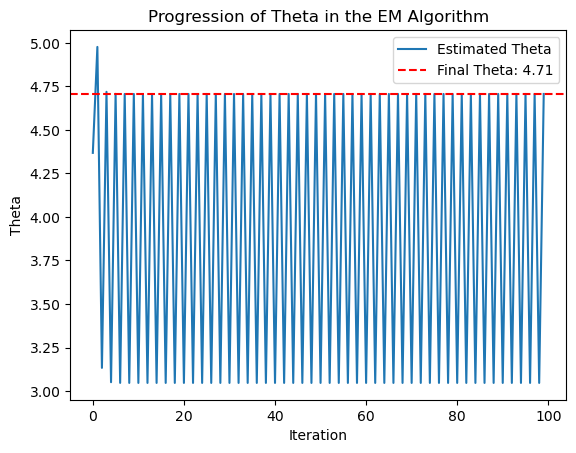

Final Estimated Theta: 4.706567038561243


In [7]:
import math
import matplotlib.pyplot as plt

# Custom approximation for the error function (erf)
def erf(x):
    t = 1 / (1 + 0.5 * abs(x))
    tau = t * math.exp(-x*x - 1.265512123484645 * t - 1.00002368 + 0.37409196 * t**2 + 0.09678418 * t**3 - 0.18628806 * t**4 + 0.27886807 * t**5 - 1.13520398 * t**6 + 1.48851587 * t**7 - 0.82215223 * t**8 + 0.17087277 * t**9)
    if x >= 0:
        return 1 - tau
    else:
        return tau - 1

# E-step
def e_step(censored_data, theta, a):
    expected_values = []
    for z in censored_data:
        if z < a:  
            expected_values.append(z)
        else:
            expected_value = theta + (1 / math.sqrt(2 * math.pi)) * math.exp(-(a - theta) ** 2 / 2) / (1 - 0.5 * (1 + erf((a - theta) / math.sqrt(2))))
            expected_values.append(expected_value)
    return expected_values

# M-step
def m_step(observed_data, expected_censored_data):
    complete_data = observed_data + expected_censored_data
    updated_theta = sum(complete_data) / len(complete_data)
    return updated_theta

# EM Algorithm with plotting
def em_algorithm(observed_data, censored_data, initial_theta, a, max_iterations=100, tol=1e-6):
    theta = initial_theta
    theta_values = []  # List to store theta values for plotting
    
    for iteration in range(max_iterations):
        # E-step
        expected_censored_data = e_step(censored_data, theta, a)
        
        # M-step
        updated_theta = m_step(observed_data, expected_censored_data)
        
        # Store theta value
        theta_values.append(updated_theta)
        
        # Check for convergence
        if abs(updated_theta - theta) < tol:
            print(f'Converged after {iteration+1} iterations')
            break
        
        theta = updated_theta
    
    return theta, theta_values

# Example usage
observed_data = [1.2, 2.4, 3.1, 0.8, 1.5]  # Example observed data (uncensored)
censored_data = [4.5, 5.1, 4.8]  # Example censored data (values >= 4.5)
initial_theta = 0  # Initial guess for theta
censoring_threshold = 4.5  # Censoring threshold

# Run the EM algorithm
estimated_theta, theta_values = em_algorithm(observed_data, censored_data, initial_theta, censoring_threshold)

# Plotting the progression of theta estimates
plt.plot(theta_values, label='Estimated Theta')
plt.axhline(y=estimated_theta, color='r', linestyle='--', label=f'Final Theta: {estimated_theta:.2f}')
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.title('Progression of Theta in the EM Algorithm')
plt.legend()
plt.show()

print(f'Final Estimated Theta: {estimated_theta}')


Before evaluating the expectation, we differentiate and set it equal to zero, solving for the EM estimate:
$$
\theta = \frac{m \bar{y} + (n - m)E[Z]}{n}
$$
This leads to the EM sequence:
$$
\theta^{(i+1)} = \bar{y} + \frac{m}{n - m} \cdot \left(E[Z] - \bar{y}\right)
$$
where $ \phi $ and $ \Phi $ are the normal pdf and cdf, respectively. (See Problem 5.16 for details of the calculations.)

The EM sequence is shown in the right panel of Figure 5.6. The convergence in this problem is quite rapid, giving an MLE of 3.99, in contrast to the observed data mean of 3.55.

### Example.18: Cellular Phone Plans

A clear case of missing data occurs in the following estimation problem. It is typical for cellular phone companies to offer "plans" of options, bundling together four or five options (such as messaging, caller id, etc.) for one price, or, alternatively, selling them separately. One cellular company had offered a four-option plan in some areas, and a five-option plan (which included the four, plus one more) in another area.

In each area, customers were asked to choose their favorite plan, and the results were tabulated. In some areas, they choose their favorite from four plans, and in some areas from five plans. The phone company is interested in knowing which are the popular plans, to help them set future prices. A portion of the data is given in Table 5.6.

We can model the complete data as follows. In area 1, there are $n_i$ customers, each of whom chooses their favorite plan from Plans 1-5. The observation for customer $i$ is $Z = (Z_1, Z_2, Z_3, Z_4, Z_5)$, where $Z \sim M(1, (P_1, P_2, ..., P_s))$. If we assume the customers are independent, in area $i$ the data are $T = (T_{a1}, T_{a2}, ..., T_{am}) = (Z_1, Z_2, ..., Z_m)$, where the $T_i$'s follow a multinomial distribution, $M(n_i, (P_1, P_2, ..., P_s))$.

The likelihood for the complete data is:
$$
L(P, T) = \prod_{i=1}^{m} \left( P_i^{T_i} \right) \prod_{j=m+1}^{n} \left( P_j^{T_j} \right)
$$
where $P = (P_1, P_2, ..., P_s)$, $T = (T_1, T_2, ..., T_m)$, and the multinomial coefficient is $ \binom{n_i}{T_i} $.

The observed-data likelihood can be calculated as:
$$
L(P | T) = \sum L(P, T, X)
$$
This leads to the missing data distribution.

### Example 5.19: Cellular Phone Plan Preferences

The data shows the number of customers who choose a particular plan as their favorite in 37 areas. Some areas ranked 4 plans, with the 5th plan denoted by `-`. Some areas ranked all 5 plans.

The complete-data likelihood is modeled as a product of negative binomial distributions:
$$
k(x | T, p) = \prod_{i=1}^{n} \prod_{j=1}^{4} P_i^{T_{ij}} \cdot (1 - p_1 - p_2 - p_3 - p_4)^{W_s}
$$

Where $ W_i = T_{ij} $ for $j = 1, 2, 3, 4 $, and $ W_s = T_s $ for $ j = 5 $.

The expected complete-data log-likelihood is:
$$
\mathbb{E}[\log L(T, p)] = \sum_{i=1}^{4} W_i \log p_i + \left(W_s + \mathbb{E}(X, p')\right) \log(1 - p_1 - p_2 - p_3 - p_4)
$$

This leads to the following EM iterations:

- **E-step**: Compute the expected complete-data log-likelihood for \( p \):
$$
E(X, p^{(i)}) = \frac{n + 1}{1 - p_1 - p_2 - p_3 - p_4}
$$

- **M-step**: Maximize \( Q(p) \) with respect to \( p \):
$$
p^{(i+1)} = \frac{\sum W_i}{\sum E(X_i, p^{(i)})}
$$

The MLE for \( p \) is approximately:
$$
p = (0.273, 0.329, 0.148, 0.125, 0.125)
$$

The convergence of the estimators is shown in Figure 6.7, with very rapid convergence.

Further details are given in Problem 5.23, and Example 9.22 provides a Gibbs sampling treatment for this problem.


### Example 5.19: EM for Mean Mixtures of Normal Distributions

Consider the mixture of two normal distributions:
$$
p N(\mu_1, \sigma_1^2) + (1 - p) N(\mu_2, \sigma_2^2),
$$
in the special case where all parameters except $ p $ are known.

#### Bimodal Likelihood

The log-likelihood surface for this model with 500 observations, where $ p = 0.7 $, $ \sigma = 1 $, and $ (\mu_1, \mu_2) = (0, 3.1) $, is shown in **Fig.8** (bottom). The surface is bimodal, with one mode near the true values of the parameters, and another mode located at $ (\mu_2, -0.5) $.

- As seen from the surface, the likelihood has two modes:
  - One near the true parameter values.
  - Another at $ (\mu_2, -0.5) $, where the likelihood is considerably smaller.

#### EM Convergence to Local Maximum

Running the EM algorithm five times with random starting points, the following occurrences were observed:
- Three of the five sequences converge to the higher mode near the true parameter values.
- Two of the five sequences converge to the lower mode, despite the lower likelihood.

This behavior occurs because the starting points for these two sequences were in the domain of attraction of the lower mode, demonstrating that the EM algorithm can converge to a local maximum.

The corresponding (increasing) sequence of log-likelihood values for each of the five runs is shown in **Figure 5.8** (top). In a few iterations, the value of the likelihood increases, but it is attracted to a local mode.

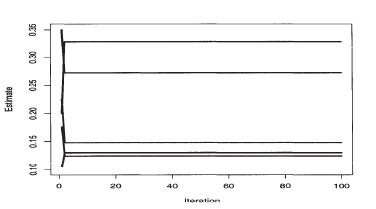

> **Note**: This is not a special occurrence for a particular sample; every simulation from this mixture will exhibit two modes of the likelihood, even though the model is completely identifiable.

### Example 5.19: EM for Mean Mixtures of Normal Distributions (Continued)

In this example, it was shown that the EM algorithm may converge to a local maximum depending on the initial values. The trajectory of five different runs of the algorithm is depicted in **Figure 5.8**.

#### Trajectories and Likelihood Values

- **Top Panel**: The trajectories show the log-likelihood values over iterations for each run of the EM algorithm.
- **Bottom Panel**: The positions of each run on the likelihood surface are shown. The log-likelihood converges to a value close to the modal value, with improvement in the likelihood being incremental after several iterations.

> **Key Takeaway**: This illustrates the importance of running the EM algorithm multiple times with different initial values to avoid converging to a local mode and to increase the chances of finding the global maximum.
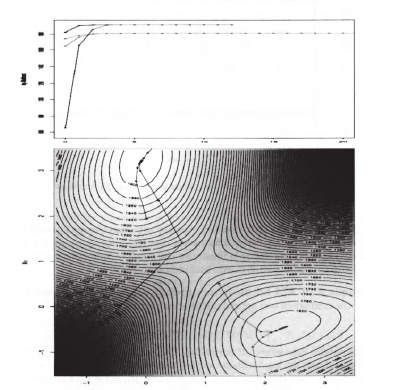


Converged after 27 iterations.
Estimated mu1: 0.035847787533618856
Estimated mu2: 3.2030425045766258
Estimated mixing proportion (p): 0.7155242138392357


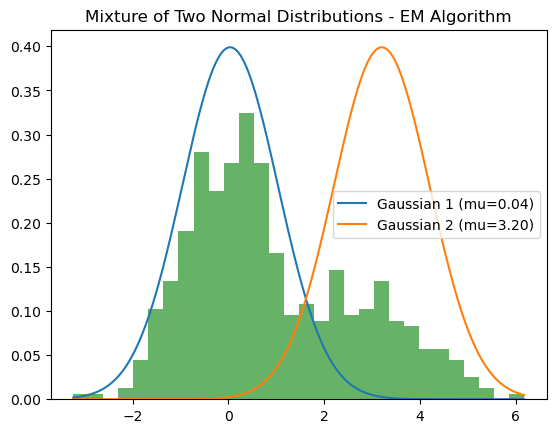

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (mixture of two normal distributions)
np.random.seed(42)

# Parameters of the true distributions
mu1 = 0      # Mean of first normal distribution
mu2 = 3.1    # Mean of second normal distribution
sigma = 1    # Standard deviation of both distributions
p = 0.7      # Mixing proportion

# Number of data points
n = 500

# Generate the data
data = np.concatenate([np.random.normal(mu1, sigma, int(p*n)), 
                       np.random.normal(mu2, sigma, int((1-p)*n))])

# Shuffle the data
np.random.shuffle(data)

# Step 2: Initialize parameters for the EM algorithm
mu1_est = 0.0   # Initial estimate for mu1
mu2_est = 2.0   # Initial estimate for mu2
sigma_est = 1.0 # Initial estimate for sigma
p_est = 0.5     # Initial estimate for mixing proportion

# Maximum number of iterations and tolerance for convergence
max_iter = 100
tol = 1e-6

# Step 3: Define the E-step and M-step
def e_step(data, mu1, mu2, sigma, p):
    """Expectation step: calculate the responsibilities."""
    # Compute the likelihood of each point for each distribution
    likelihood1 = (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(data - mu1)**2 / (2 * sigma**2))
    likelihood2 = (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(data - mu2)**2 / (2 * sigma**2))
    
    # Calculate the responsibilities
    resp1 = p * likelihood1 / (p * likelihood1 + (1 - p) * likelihood2)
    resp2 = 1 - resp1
    
    return resp1, resp2

def m_step(data, resp1, resp2):
    """Maximization step: update the parameters."""
    # Update the parameters using the current responsibilities
    mu1_new = np.sum(resp1 * data) / np.sum(resp1)
    mu2_new = np.sum(resp2 * data) / np.sum(resp2)
    p_new = np.sum(resp1) / len(data)
    
    return mu1_new, mu2_new, p_new

# Step 4: Implement the EM algorithm
def em_algorithm(data, mu1_est, mu2_est, sigma_est, p_est, max_iter=100, tol=1e-6):
    for iteration in range(max_iter):
        # E-step: calculate responsibilities
        resp1, resp2 = e_step(data, mu1_est, mu2_est, sigma_est, p_est)
        
        # M-step: update parameters
        mu1_new, mu2_new, p_new = m_step(data, resp1, resp2)
        
        # Check for convergence (if parameter estimates don't change significantly)
        if np.abs(mu1_new - mu1_est) < tol and np.abs(mu2_new - mu2_est) < tol and np.abs(p_new - p_est) < tol:
            print(f"Converged after {iteration+1} iterations.")
            break
        
        # Update estimates
        mu1_est, mu2_est, p_est = mu1_new, mu2_new, p_new
    
    return mu1_est, mu2_est, p_est

# Run the EM algorithm to estimate the parameters
mu1_est, mu2_est, p_est = em_algorithm(data, mu1_est, mu2_est, sigma_est, p_est)

print(f"Estimated mu1: {mu1_est}")
print(f"Estimated mu2: {mu2_est}")
print(f"Estimated mixing proportion (p): {p_est}")

# Plot the data and the estimated Gaussian distributions
x = np.linspace(min(data), max(data), 1000)
y1 = (1/np.sqrt(2*np.pi*sigma_est**2)) * np.exp(-(x - mu1_est)**2 / (2 * sigma_est**2))
y2 = (1/np.sqrt(2*np.pi*sigma_est**2)) * np.exp(-(x - mu2_est)**2 / (2 * sigma_est**2))

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, y1, label=f'Gaussian 1 (mu={mu1_est:.2f})')
plt.plot(x, y2, label=f'Gaussian 2 (mu={mu2_est:.2f})')
plt.legend()
plt.title("Mixture of Two Normal Distributions - EM Algorithm")
plt.show()


In [9]:
import random
import math

# Step 1: Generate synthetic data (mixture of two normal distributions)
random.seed(42)

# Parameters of the true distributions
mu1 = 0      # Mean of first normal distribution
mu2 = 3.1    # Mean of second normal distribution
sigma = 1    # Standard deviation of both distributions
p = 0.7      # Mixing proportion

# Number of data points
n = 500

# Generate the data
data = []
for _ in range(int(p * n)):
    data.append(random.gauss(mu1, sigma))  # Points from the first normal distribution
for _ in range(int((1 - p) * n)):
    data.append(random.gauss(mu2, sigma))  # Points from the second normal distribution

# Step 2: Initialize parameters for the EM algorithm
mu1_est = 0.0   # Initial estimate for mu1
mu2_est = 2.0   # Initial estimate for mu2
sigma_est = 1.0 # Initial estimate for sigma
p_est = 0.5     # Initial estimate for mixing proportion

# Maximum number of iterations and tolerance for convergence
max_iter = 100
tol = 1e-6

# Step 3: Define the E-step and M-step

def normal_pdf(x, mu, sigma):
    """Normal probability density function"""
    return (1 / (math.sqrt(2 * math.pi * sigma**2))) * math.exp(-(x - mu)**2 / (2 * sigma**2))

def e_step(data, mu1, mu2, sigma, p):
    """Expectation step: calculate the responsibilities"""
    resp1 = []
    resp2 = []
    
    for x in data:
        likelihood1 = normal_pdf(x, mu1, sigma)
        likelihood2 = normal_pdf(x, mu2, sigma)
        # Calculate the responsibilities
        resp1.append(p * likelihood1 / (p * likelihood1 + (1 - p) * likelihood2))
        resp2.append(1 - resp1[-1])  # Since resp2 = 1 - resp1
    
    return resp1, resp2

def m_step(data, resp1, resp2):
    """Maximization step: update the parameters"""
    # Update the parameters using the current responsibilities
    mu1_new = sum(r * x for r, x in zip(resp1, data)) / sum(resp1)
    mu2_new = sum(r * x for r, x in zip(resp2, data)) / sum(resp2)
    p_new = sum(resp1) / len(data)
    
    return mu1_new, mu2_new, p_new

# Step 4: Implement the EM algorithm
def em_algorithm(data, mu1_est, mu2_est, sigma_est, p_est, max_iter=100, tol=1e-6):
    for iteration in range(max_iter):
        # E-step: calculate responsibilities
        resp1, resp2 = e_step(data, mu1_est, mu2_est, sigma_est, p_est)
        
        # M-step: update parameters
        mu1_new, mu2_new, p_new = m_step(data, resp1, resp2)
        
        # Check for convergence (if parameter estimates don't change significantly)
        if (abs(mu1_new - mu1_est) < tol and abs(mu2_new - mu2_est) < tol and abs(p_new - p_est) < tol):
            print(f"Converged after {iteration+1} iterations.")
            break
        
        # Update estimates
        mu1_est, mu2_est, p_est = mu1_new, mu2_new, p_new
    
    return mu1_est, mu2_est, p_est

# Run the EM algorithm to estimate the parameters
mu1_est, mu2_est, p_est = em_algorithm(data, mu1_est, mu2_est, sigma_est, p_est)

print(f"Estimated mu1: {mu1_est}")
print(f"Estimated mu2: {mu2_est}")
print(f"Estimated mixing proportion (p): {p_est}")


Converged after 32 iterations.
Estimated mu1: 0.045666561249945586
Estimated mu2: 2.9720420156680274
Estimated mixing proportion (p): 0.6837354901682091


Converged after 32 iterations.


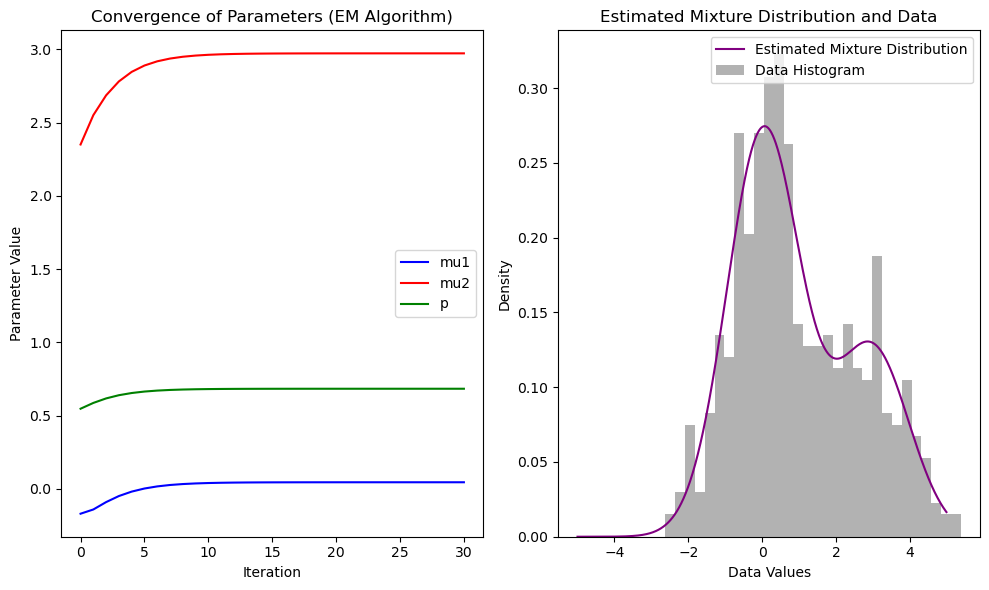

In [10]:
import random
import math
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (mixture of two normal distributions)
random.seed(42)

# Parameters of the true distributions
mu1 = 0      # Mean of first normal distribution
mu2 = 3.1    # Mean of second normal distribution
sigma = 1    # Standard deviation of both distributions
p = 0.7      # Mixing proportion

# Number of data points
n = 500

# Generate the data
data = []
for _ in range(int(p * n)):
    data.append(random.gauss(mu1, sigma))  # Points from the first normal distribution
for _ in range(int((1 - p) * n)):
    data.append(random.gauss(mu2, sigma))  # Points from the second normal distribution

# Step 2: Initialize parameters for the EM algorithm
mu1_est = 0.0   # Initial estimate for mu1
mu2_est = 2.0   # Initial estimate for mu2
sigma_est = 1.0 # Initial estimate for sigma
p_est = 0.5     # Initial estimate for mixing proportion

# Maximum number of iterations and tolerance for convergence
max_iter = 100
tol = 1e-6

# Step 3: Define the E-step and M-step

def normal_pdf(x, mu, sigma):
    """Normal probability density function"""
    return (1 / (math.sqrt(2 * math.pi * sigma**2))) * math.exp(-(x - mu)**2 / (2 * sigma**2))

def e_step(data, mu1, mu2, sigma, p):
    """Expectation step: calculate the responsibilities"""
    resp1 = []
    resp2 = []
    
    for x in data:
        likelihood1 = normal_pdf(x, mu1, sigma)
        likelihood2 = normal_pdf(x, mu2, sigma)
        # Calculate the responsibilities
        resp1.append(p * likelihood1 / (p * likelihood1 + (1 - p) * likelihood2))
        resp2.append(1 - resp1[-1])  # Since resp2 = 1 - resp1
    
    return resp1, resp2

def m_step(data, resp1, resp2):
    """Maximization step: update the parameters"""
    # Update the parameters using the current responsibilities
    mu1_new = sum(r * x for r, x in zip(resp1, data)) / sum(resp1)
    mu2_new = sum(r * x for r, x in zip(resp2, data)) / sum(resp2)
    p_new = sum(resp1) / len(data)
    
    return mu1_new, mu2_new, p_new

# Step 4: Implement the EM algorithm
def em_algorithm(data, mu1_est, mu2_est, sigma_est, p_est, max_iter=100, tol=1e-6):
    mu1_vals = []
    mu2_vals = []
    p_vals = []
    
    for iteration in range(max_iter):
        # E-step: calculate responsibilities
        resp1, resp2 = e_step(data, mu1_est, mu2_est, sigma_est, p_est)
        
        # M-step: update parameters
        mu1_new, mu2_new, p_new = m_step(data, resp1, resp2)
        
        # Check for convergence (if parameter estimates don't change significantly)
        if (abs(mu1_new - mu1_est) < tol and abs(mu2_new - mu2_est) < tol and abs(p_new - p_est) < tol):
            print(f"Converged after {iteration+1} iterations.")
            break
        
        # Update estimates
        mu1_est, mu2_est, p_est = mu1_new, mu2_new, p_new
        
        # Store values for plotting
        mu1_vals.append(mu1_est)
        mu2_vals.append(mu2_est)
        p_vals.append(p_est)
    
    return mu1_vals, mu2_vals, p_vals, mu1_est, mu2_est, p_est

# Run the EM algorithm to estimate the parameters
mu1_vals, mu2_vals, p_vals, mu1_est, mu2_est, p_est = em_algorithm(data, mu1_est, mu2_est, sigma_est, p_est)

# Plot the convergence of the parameters
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(mu1_vals, label="mu1", color='blue')
plt.plot(mu2_vals, label="mu2", color='red')
plt.plot(p_vals, label="p", color='green')
plt.title("Convergence of Parameters (EM Algorithm)")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

# Plot the estimated mixture distribution
plt.subplot(1, 2, 2)
x_values = [x / 100 for x in range(-500, 500)]
y_values = [p_est * normal_pdf(x, mu1_est, sigma_est) + (1 - p_est) * normal_pdf(x, mu2_est, sigma_est) for x in x_values]
plt.plot(x_values, y_values, label="Estimated Mixture Distribution", color='purple')
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label="Data Histogram")
plt.title("Estimated Mixture Distribution and Data")
plt.xlabel("Data Values")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()
